# Peer Graded Assignment – Extracting and Visualizing Stock Data

**Author:** Syed Anwar

This notebook extracts stock data and quarterly revenue for Tesla and GameStop, then visualizes stock price vs revenue as required by the assignment.

## Q1: Extract Tesla Stock Data (using yfinance)

Download historical Tesla stock data and display the first and last 5 rows.

In [7]:
# Q1: Extract Tesla Stock Data using yfinance
import yfinance as yf
import pandas as pd
from IPython.display import display

tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)

# Keep relevant columns and sort
if 'Close' in tesla_data.columns:
    tesla_data = tesla_data[['Date','Open','High','Low','Close','Volume']]
tesla_data = tesla_data.sort_values('Date').reset_index(drop=True)

print("Tesla data shape:", tesla_data.shape)
display(tesla_data.head())


Tesla data shape: (3834, 6)


,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


## Q2: Webscrape Tesla Quarterly Revenue

Scrape Tesla quarterly revenue from the course-hosted page and clean the `Revenue` column.

In [8]:
# Q2: Webscraping Tesla Revenue Data
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find("tbody")
if table:
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if cols and len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"\$|,","", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'], errors='coerce')

tesla_revenue = tesla_revenue.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)

print("Tesla revenue shape:", tesla_revenue.shape)

display(tesla_revenue.tail())

Tesla revenue shape: (13, 2)


,Date,Revenue
8,2017-01-01,11759
9,2018-01-01,21461
10,2019-01-01,24578
11,2020-01-01,31536
12,2021-01-01,53823


## Q3: Extract GameStop Stock Data (using yfinance)

Download historical GameStop (GME) stock data and show first/last rows.

In [9]:
# Q3: Extract GameStop Stock Data using yfinance
from IPython.display import display
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
if 'Close' in gme_data.columns:
    gme_data = gme_data[['Date','Open','High','Low','Close','Volume']]
gme_data = gme_data.sort_values('Date').reset_index(drop=True)
print("GME data shape:", gme_data.shape)
display(gme_data.head())


GME data shape: (5942, 6)


,Date,Open,High,Low,Close,Volume
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800


## Q4: Webscrape GameStop Quarterly Revenue

Scrape GameStop quarterly revenue from the course-hosted page and clean it.

In [10]:
# Q4: Webscraping GameStop Revenue Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue2.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find("tbody")
if table:
    for row in table.find_all("tr"):
        cols = row.find_all("td")
        if cols and len(cols) >= 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"\$|,","", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'], errors='coerce')

gme_revenue = gme_revenue.dropna(subset=['Date']).sort_values('Date').reset_index(drop=True)

print("GME revenue shape:", gme_revenue.shape)

display(gme_revenue.tail())

GME revenue shape: (0, 2)


C:\Users\SYED ANWAR\Documents\anaconda\Lib\html\parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


,Date,Revenue


## Q5: Plot Tesla Stock Price vs Quarterly Revenue

Create a combined plot (dual y-axis) showing Tesla's stock price and quarterly revenue similar to the rubric screenshots.

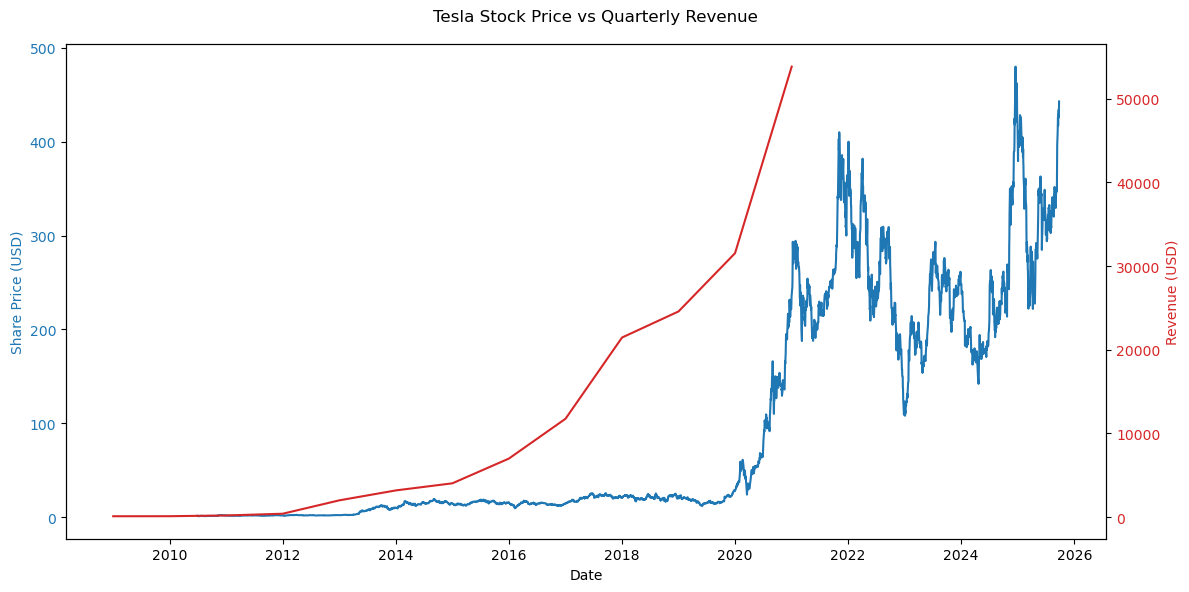

In [11]:
# Q5: Tesla Stock vs Revenue Plot
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Share Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Share Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.suptitle(f"{stock_name} Stock Price vs Quarterly Revenue")
    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, "Tesla")

## Q6: Plot GameStop Stock Price vs Quarterly Revenue

Create a combined plot (dual y-axis) showing GameStop's stock price and quarterly revenue similar to the rubric screenshots.

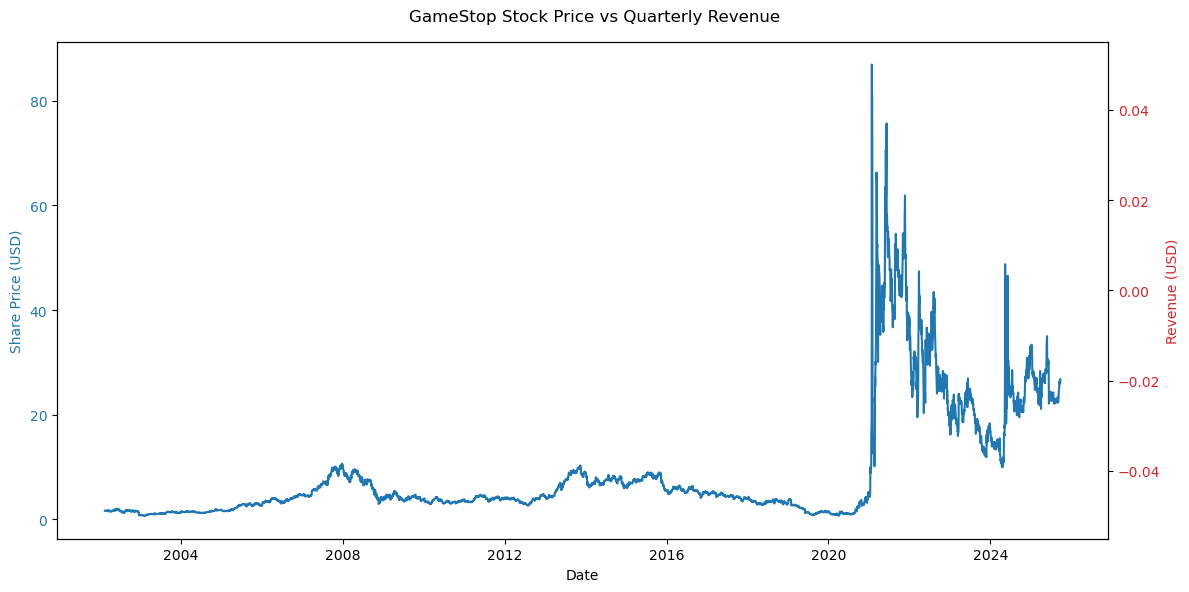

In [12]:
# Q6: GameStop Stock vs Revenue Plot
make_graph(gme_data, gme_revenue, "GameStop")